In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


# Imports

In [2]:
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [3]:
plt.style.use('ggplot')

# Get the data

In [4]:
path = str("/kaggle/input/playground-series-s4e2")
train = pd.read_csv(f"{path}/train.csv")
test = pd.read_csv(f"{path}/test.csv")
submission = pd.read_csv(f"{path}/sample_submission.csv")

# EDA

In [5]:
print(f"Training data shape: {train.shape}")
print(f"Test data shape: {test.shape}")

Training data shape: (20758, 18)
Test data shape: (13840, 17)


In [6]:
train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
train.head().T

,0,1,2,3,4
id,0,1,2,3,4
Gender,Male,Female,Female,Female,Male
Age,24.443011,18.0,18.0,20.952737,31.641081
Height,1.699998,1.56,1.71146,1.71073,1.914186
Weight,81.66995,57.0,50.165754,131.274851,93.798055
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.0,2.0,1.880534,3.0,2.679664
NCP,2.983297,3.0,1.411685,3.0,1.971472
CAEC,Sometimes,Frequently,Sometimes,Sometimes,Sometimes


In [8]:
train.tail().T

,20753,20754,20755,20756,20757
id,20753,20754,20755,20756,20757
Gender,Male,Male,Male,Male,Male
Age,25.137087,18.0,20.101026,33.852953,26.680376
Height,1.766626,1.71,1.819557,1.7,1.816547
Weight,114.187096,50.0,105.580491,83.520113,118.134898
family_history_with_overweight,yes,no,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.919584,3.0,2.407817,2.671238,3.0
NCP,3.0,4.0,3.0,1.971472,3.0
CAEC,Sometimes,Frequently,Sometimes,Sometimes,Sometimes


In [9]:
test.head().T

,0,1,2,3,4
id,20758,20759,20760,20761,20762
Gender,Male,Female,Female,Male,Female
Age,26.899886,21.0,26.0,20.979254,26.0
Height,1.848294,1.6,1.643355,1.553127,1.627396
Weight,120.644178,66.0,111.600553,103.669116,104.835346
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.938616,2.0,3.0,2.0,3.0
NCP,3.0,1.0,3.0,2.977909,3.0
CAEC,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes


In [10]:
test.tail().T

,13835,13836,13837,13838,13839
id,34593,34594,34595,34596,34597
Gender,Male,Female,Female,Male,Male
Age,23.327836,29.0,22.935612,21.0,26.490926
Height,1.721384,1.59,1.585547,1.62,1.812259
Weight,78.030383,62.0,44.376637,53.0,120.980508
family_history_with_overweight,yes,no,no,yes,yes
FAVC,no,yes,yes,yes,yes
FCVC,2.813234,3.0,3.0,2.0,2.744994
NCP,3.0,3.0,2.27374,3.0,3.0
CAEC,Sometimes,Sometimes,Frequently,Sometimes,Sometimes


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [13]:
target = train["NObeyesdad"]
train.drop(columns=["id", "NObeyesdad"], inplace=True)
test_id = test["id"]
test.drop(columns=["id"], inplace=True)

In [14]:
categorical_features = train.select_dtypes(include=["object"]).columns
numerical_features = train.select_dtypes(include=["int64", "float64"]).columns

## Target analysis

In [15]:
target.value_counts(ascending=False)

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

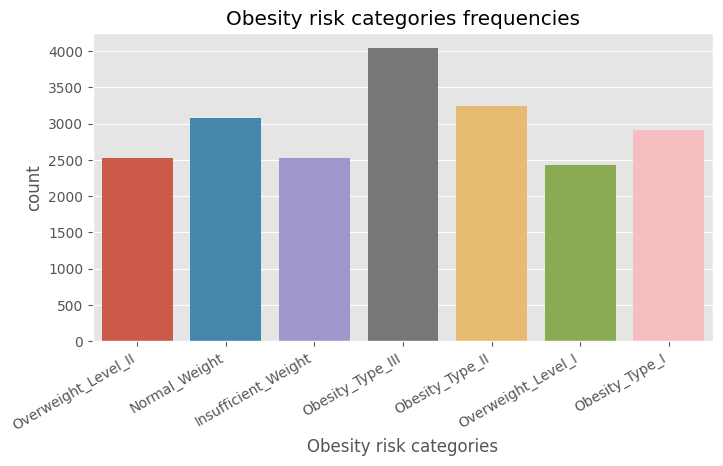

In [16]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x=target)
plt.title("Obesity risk categories frequencies")
plt.xlabel("Obesity risk categories")
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

In [17]:
target.head()

0    Overweight_Level_II
1          Normal_Weight
2    Insufficient_Weight
3       Obesity_Type_III
4    Overweight_Level_II
Name: NObeyesdad, dtype: object

## Feature analysis

In [18]:
for feature in categorical_features:
    print(f"{feature}: {train[feature].unique()}")
    if feature == "NObeyesdad": continue
    print(f"{feature}: {test[feature].unique()}")    

Gender: ['Male' 'Female']
Gender: ['Male' 'Female']
family_history_with_overweight: ['yes' 'no']
family_history_with_overweight: ['yes' 'no']
FAVC: ['yes' 'no']
FAVC: ['yes' 'no']
CAEC: ['Sometimes' 'Frequently' 'no' 'Always']
CAEC: ['Sometimes' 'Always' 'Frequently' 'no']
SMOKE: ['no' 'yes']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['Sometimes' 'no' 'Frequently']
CALC: ['Sometimes' 'no' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']


**_Insight:_** The value `Always` of feature `CALC` only appears in the test data.

In [19]:
train[numerical_features].nunique()

Age       1703
Height    1833
Weight    1979
FCVC       934
NCP        689
CH2O      1506
FAF       1360
TUE       1297
dtype: int64

In [20]:
train.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [21]:
test.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


### Missing values

In [22]:
train.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [23]:
test.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

**_Insight:_** There are no missing values in the train data and in the test data.

### Find duplicates

In [24]:
def find_duplicates(train, test):
    df = train.copy()
    df = pd.concat([train, test], keys=[0,1], axis = 0)
    print(f"There are {df.duplicated().sum()} duplicates in the data.")

find_duplicates(train, test)

There are 0 duplicates in the data.


### Show distributions

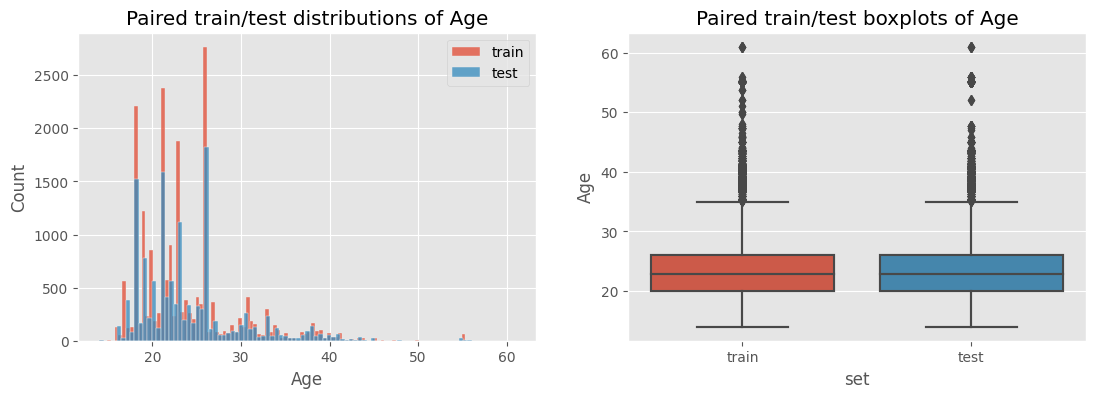

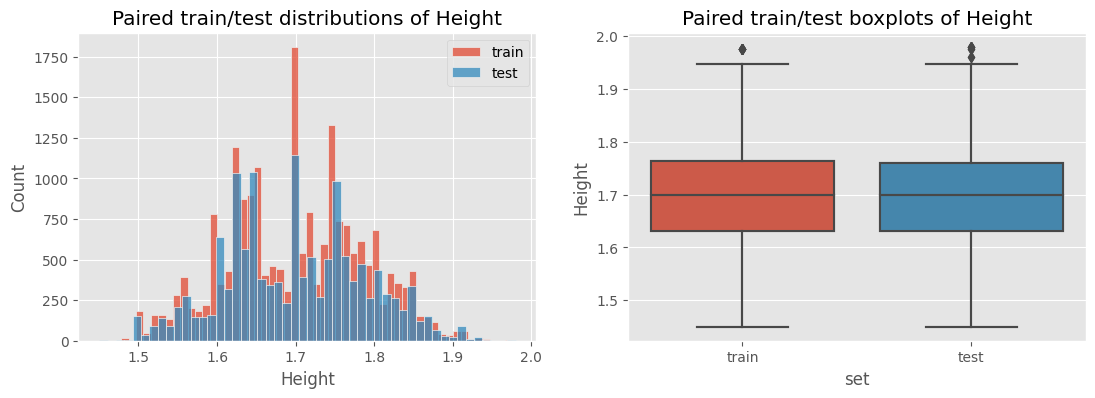

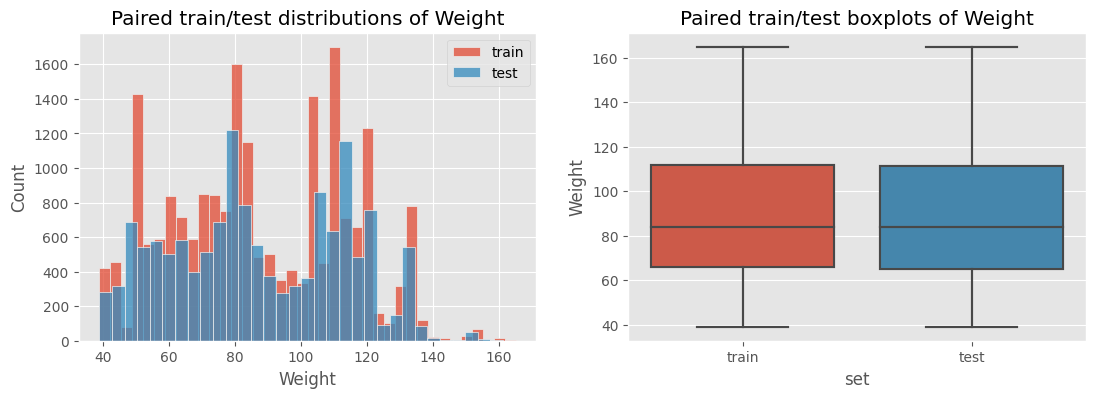

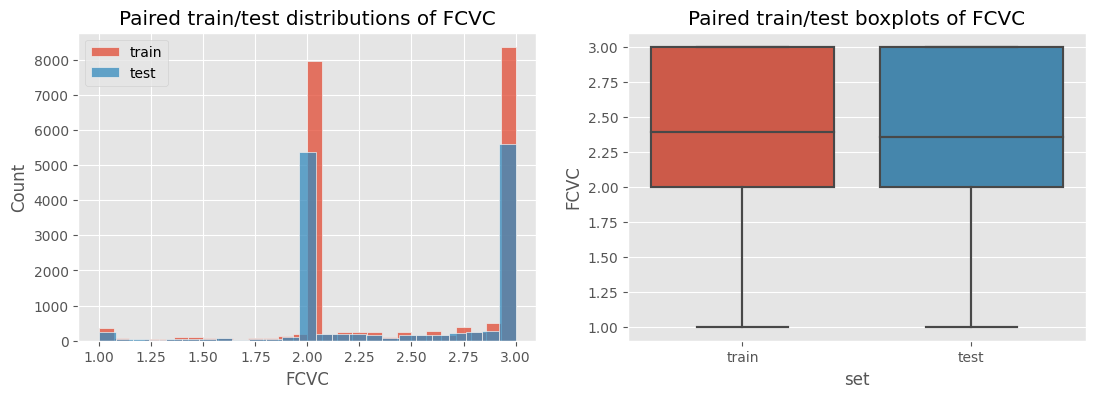

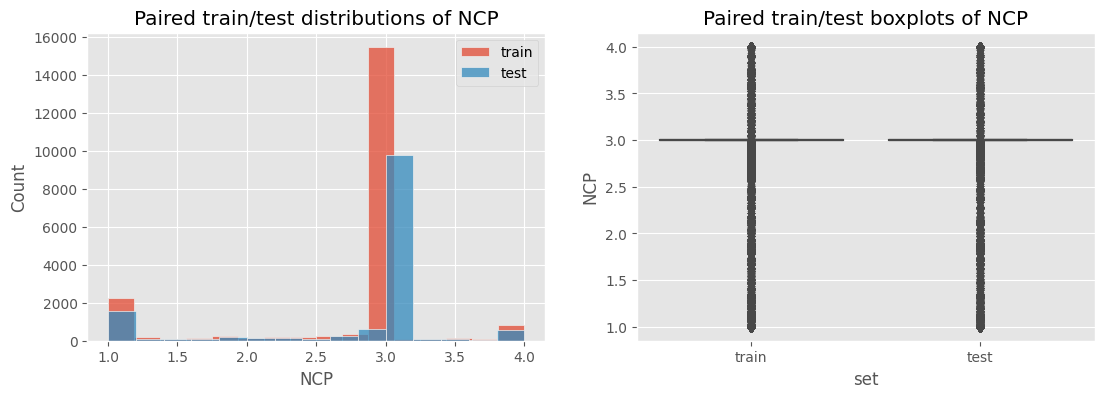

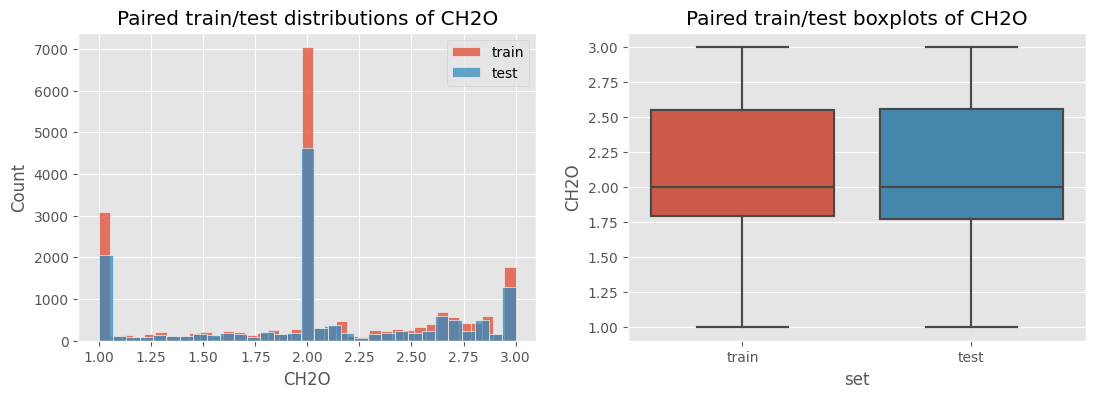

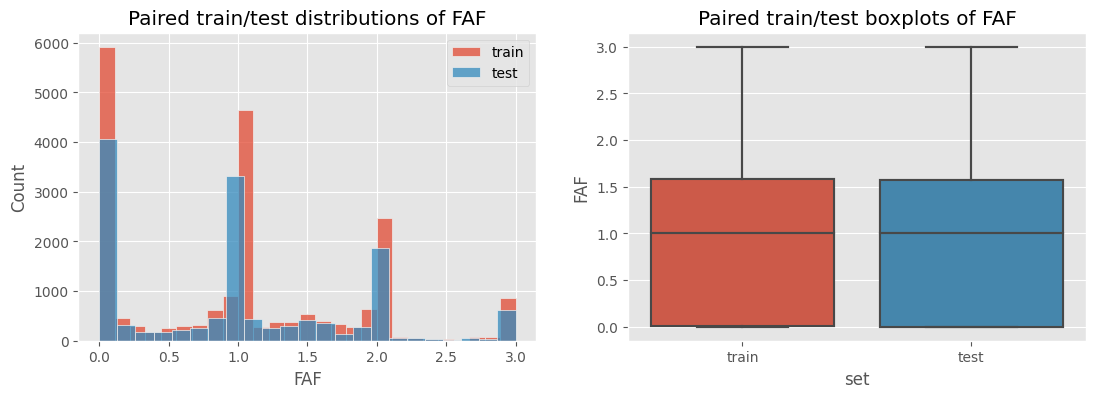

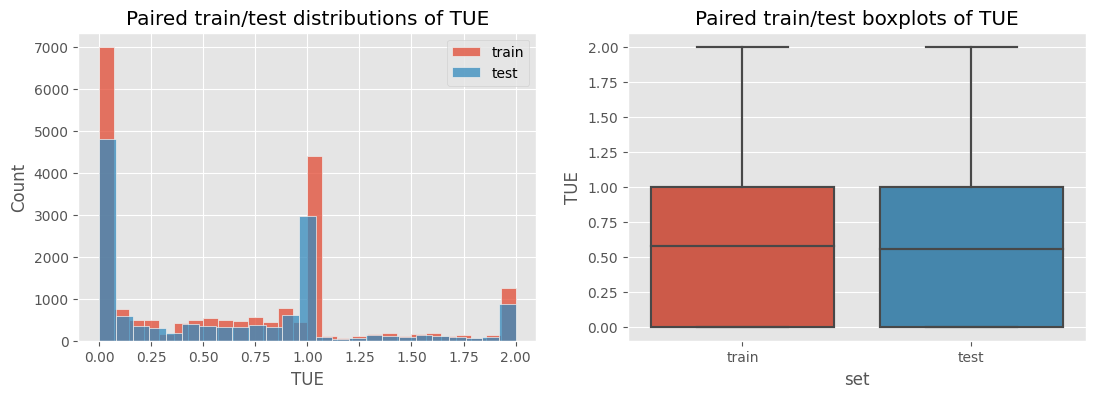

In [25]:
def plot_distribution_pairs(train, test, feature, hue="set", palette=None):
    df = train.copy()
    df["set"] = "train"    
    df = pd.concat([df, test.copy()]).fillna("test")
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(13,4))
    for i, s in enumerate(df[hue].unique()):
        selection = df.loc[df[hue]==s, feature]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            g_hist = sns.histplot(selection, ax=ax[0], label=s)
            g_box = sns.boxplot(x=hue, y=feature, data=df, ax=ax[1])
    
    ax[0].set_title(f"Paired train/test distributions of {feature}")
    ax[1].set_title(f"Paired train/test boxplots of {feature}")
    
    g_hist.legend()
    plt.show()

for feature in numerical_features:
    plot_distribution_pairs(train, test, feature)

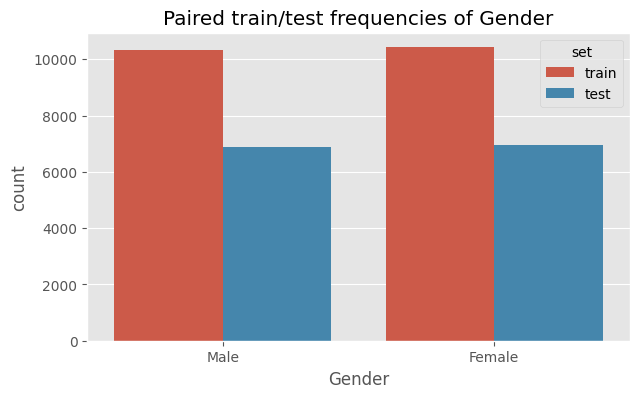

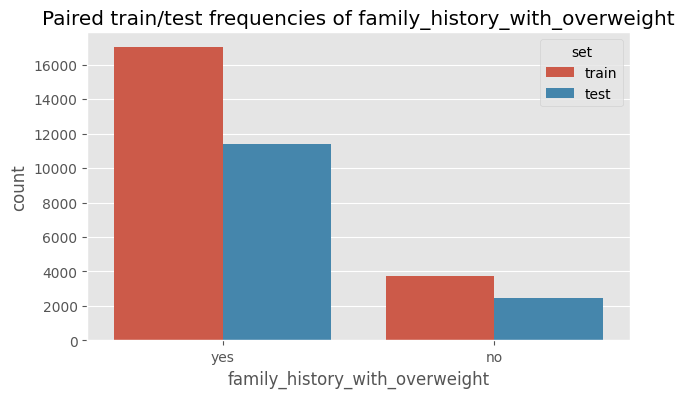

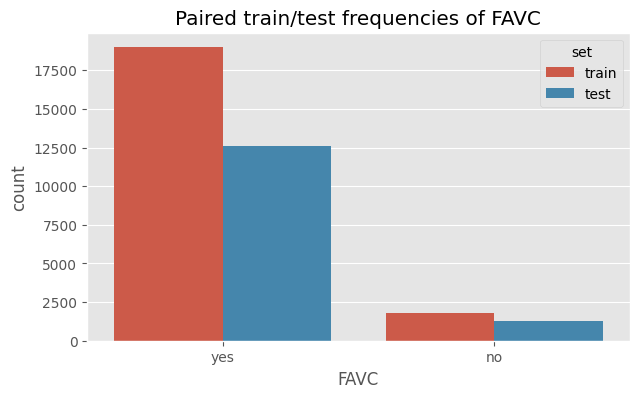

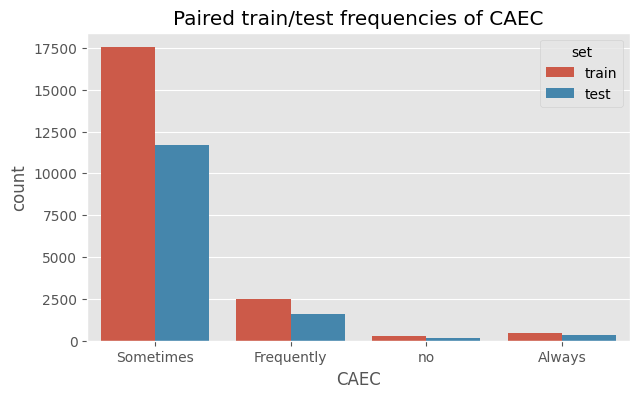

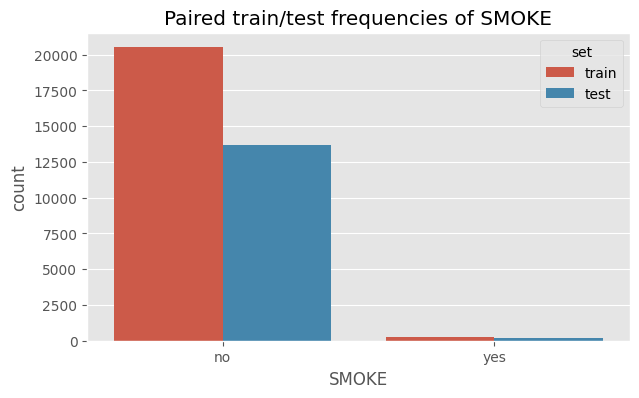

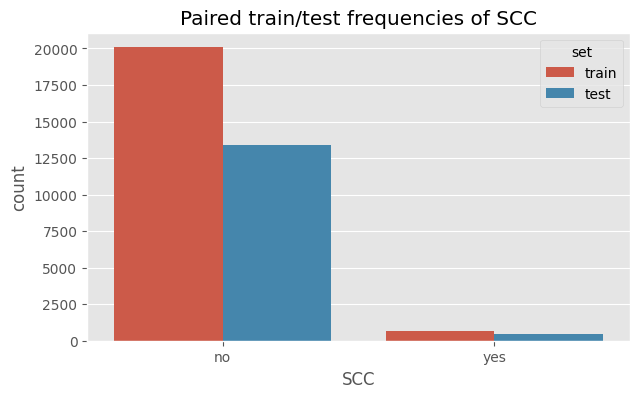

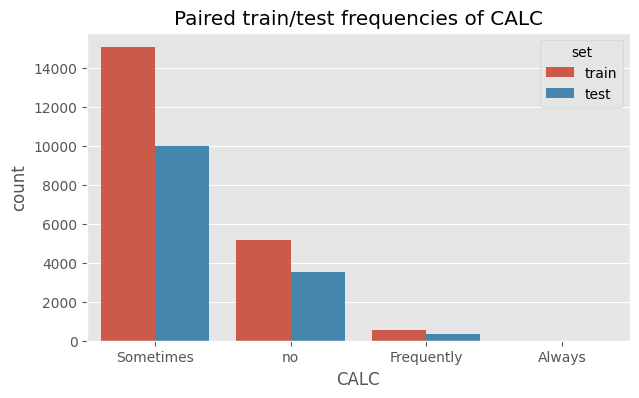

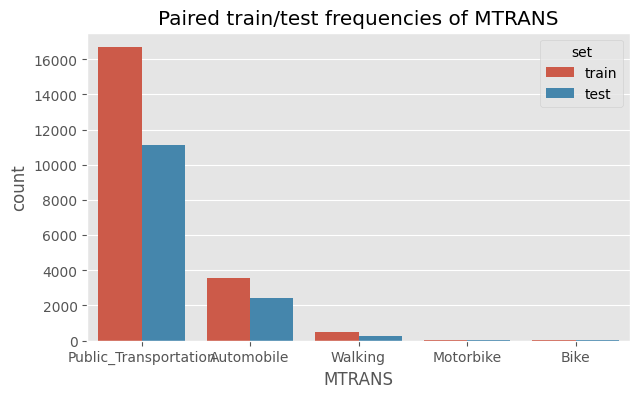

In [26]:
def plot_count_pairs(train, test, feature, hue="set"):
    df = train.copy()
    df["set"] = "train"
    df = pd.concat([df, test.copy()]).fillna("test")
    
    f, ax = plt.subplots(1, 1, figsize=(7, 4))
    sns.countplot(data=df, x=feature, hue=hue)
    ax.set_title(f"Paired train/test frequencies of {feature}")

for feature in categorical_features:
    if feature == "NObeyesdad": continue
    plot_count_pairs(train, test, feature)

## Feature engineering

In [27]:
feature_dict = {
    "Gender": {
        'Female': 0,
        'Male': 1 
    },
    "family_history_with_overweight": {
        'no': 0,
        'yes': 1 
    },
    "FAVC": {
        'no': 0,
        'yes': 1 
    },
    "CAEC": {
        'no': 0, 
        'Sometimes': 1, 
        'Frequently': 2, 
        'Always': 3
    },
    "SMOKE": {
        'no': 0, 
        'yes': 1
    },
    "SCC": {
        'no': 0, 
        'yes': 1
    },
    "CALC": {
        'no': 0,
        'Sometimes': 1,
        'Frequently': 2,
        "Always": 3,
    },
}

obesity_dict = {
    'Insufficient_Weight': 1,
    'Normal_Weight': 0,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6,
}

inverse_obesity_dict = {
    1: 'Insufficient_Weight',
    0: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III' 
}

all_df = pd.concat([train, test], keys=[0, 1], axis=0)
for feature in categorical_features:
    if feature == "MTRANS":
        df_onehot = pd.get_dummies(all_df['MTRANS'])
        all_df = pd.concat([all_df, df_onehot], axis=1)
        all_df.drop(columns=["MTRANS"], inplace=True)
    else:
        all_df[feature] = all_df[feature].map(feature_dict[feature])
    
train = all_df.xs(0).copy()
test = all_df.xs(1).copy()
target = target.map(obesity_dict)

In [28]:
train.head().T

,0,1,2,3,4
Gender,1,0,0,0,1
Age,24.443011,18.0,18.0,20.952737,31.641081
Height,1.699998,1.56,1.71146,1.71073,1.914186
Weight,81.66995,57.0,50.165754,131.274851,93.798055
family_history_with_overweight,1,1,1,1,1
FAVC,1,1,1,1,1
FCVC,2.0,2.0,1.880534,3.0,2.679664
NCP,2.983297,3.0,1.411685,3.0,1.971472
CAEC,1,2,1,1,1
SMOKE,0,0,0,0,0


In [29]:
test.head().T

,0,1,2,3,4
Gender,1,0,0,1,0
Age,26.899886,21.0,26.0,20.979254,26.0
Height,1.848294,1.6,1.643355,1.553127,1.627396
Weight,120.644178,66.0,111.600553,103.669116,104.835346
family_history_with_overweight,1,1,1,1,1
FAVC,1,1,1,1,1
FCVC,2.938616,2.0,3.0,2.0,3.0
NCP,3.0,1.0,3.0,2.977909,3.0
CAEC,1,1,1,1,1
SMOKE,0,0,0,0,0


# Model

In [30]:
X = train
y = target
X_test = test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
def fit_xgb_classifier(model, X_train, y_train, X_val, y_val, verbose=100):
    eval_set = [(X_train, y_train), (X_val, y_val)]
    model.fit(X_train, y_train, eval_set=eval_set, verbose=verbose)
    
    acc_train = accuracy_score(model.predict(X_train),y_train)
    acc_val = accuracy_score(model.predict(X_val),y_val)
    print(f"train_accuracy: {acc_train:.4f}\ntest_accuracy: {acc_val:.4f}")
    
    results = model.evals_result()
    val_mlogloss = results["validation_1"]["mlogloss"]
    best_epopch = min(val_mlogloss)
    i_best_epoch = val_mlogloss.index(best_epopch)
    print(f"Best mlogloss: {best_epopch}\nBest epoch: {i_best_epoch}")
    epochs = len(results['validation_0']['mlogloss'])
    x_axis = range(0, epochs)
    
    # plot m log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
    ax.plot(i_best_epoch, best_epopch, marker="o", color="green", label="Best")
    ax.legend()
    plt.ylabel('M Log Loss')
    plt.title('XGBoost M Log Loss')
    plt.show()

In [32]:
xgb_0 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=400,
    #early_stopping_rounds=50,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    colsample_bytree=0.8,
    subsample=0.8,
    objective= 'multi:softprob',
    nthread=-1,
    random_state=42
)
#fit_xgb_classifier(xgb_0, X_train, y_train, X_val, y_val)

In [33]:
param_grid = {
    #"max_depth": [3,5,7,9],
    #"min_child_weight": [0, 1,3,5],
    #"max_depth": [6,5,4],
    #"min_child_weight": [2.5,3,3.5],
    #"gamma": [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    #"gamma": [0.05, 0.1, 0.15],    
    #"colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    #"subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    #"colsample_bytree": [0.55, 0.6, 0.65],
    #"subsample": [0.65, 0.7, 0.75],
    #"reg_alpha":[0, 1e-5, 1e-2, 0.1, 1, 100],
    #"reg_alpha":[1e-5,1e-6,1e-7],
    
}
gs = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate =0.1,
        n_estimators=180,
        max_depth=5,
        min_child_weight=3,
        gamma=0.1,
        colsample_bytree=0.6,
        subsample=0.65,
        objective= 'multi:softprob',
        nthread=-1,
        random_state=42
    ),
    param_grid=param_grid,
    scoring="f1_weighted",
    n_jobs=-1,
    cv=5,
    verbose=5
)
#gs.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=180)
#acc_train = accuracy_score(gs.predict(X_train),y_train)
#acc_val = accuracy_score(gs.predict(X_val),y_val)
#print(f"model: gs\ntrain_accuracy: {acc_train:.4f}\ntest_accuracy: {acc_val:.4f}")
#print(f"Best params: {gs.best_params_}\n Best score: {gs.best_score_}")

In [34]:
xgb_1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    early_stopping_rounds=50,
    max_depth=5,
    min_child_weight=3,
    gamma=0.1,
    colsample_bytree=0.6,
    subsample=0.65,
    reg_alpha=0.01,
    objective= 'multi:softprob',
    nthread=-1,
    random_state=42
)
#fit_xgb_classifier(xgb_1, X_train, y_train, X_val, y_val)

[0]	validation_0-mlogloss:1.92700	validation_1-mlogloss:1.92717
[500]	validation_0-mlogloss:0.34989	validation_1-mlogloss:0.36741
[1000]	validation_0-mlogloss:0.25441	validation_1-mlogloss:0.28676
[1500]	validation_0-mlogloss:0.21807	validation_1-mlogloss:0.26921
[2000]	validation_0-mlogloss:0.19496	validation_1-mlogloss:0.26362
[2500]	validation_0-mlogloss:0.17787	validation_1-mlogloss:0.26207
[2728]	validation_0-mlogloss:0.17137	validation_1-mlogloss:0.26188
train_accuracy: 0.9409
test_accuracy: 0.9109
Best mlogloss: 0.2617728183332318
Best epoch: 2678


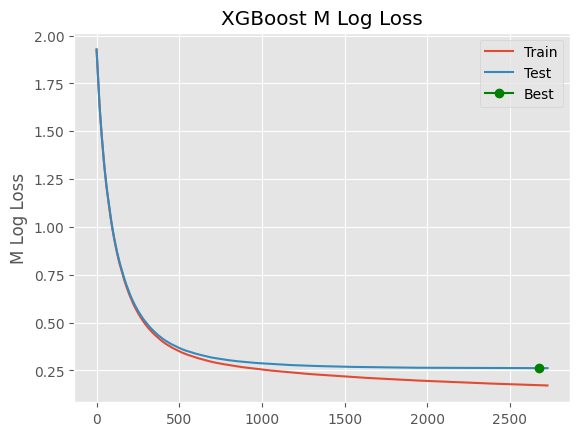

In [35]:
xgb_2 = XGBClassifier(
    learning_rate =0.01,
    n_estimators=5000,
    early_stopping_rounds=50,
    max_depth=4,
    min_child_weight=0.5,
    gamma=0.2,
    colsample_bytree=0.7,
    subsample=0.7,
    reg_alpha=1,
    objective= 'multi:softprob',
    nthread=-1,
    random_state=42
)
fit_xgb_classifier(xgb_2, X_train, y_train, X_val, y_val, verbose=500)

# Submission

In [36]:
best = xgb_2
predictions = best.predict(X_test)
submission["NObeyesdad"] = predictions
submission["NObeyesdad"] = submission["NObeyesdad"].map(inverse_obesity_dict)
submission.head(20)

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
5,20763,Insufficient_Weight
6,20764,Insufficient_Weight
7,20765,Normal_Weight
8,20766,Overweight_Level_II
9,20767,Normal_Weight


In [37]:
submission.to_csv("submission.csv", index=False)